In [10]:
import matplotlib.pyplot as plt
import plotly.express as px
from matminer.datasets import load_dataset
from pymatviz import ptable_heatmap, spacegroup_hist, spacegroup_sunburst
from pymatviz.utils import get_crystal_sys
from tqdm import tqdm

In [11]:
df_diel = load_dataset("matbench_dielectric")
df_diel[["sg_symbol", "spg_num"]] = [
    struct.get_space_group_info() for struct in tqdm(df_diel.structure)
]

Text(0.5, 1.0, 'Elemental prevalence in the Matbench dielectric dataset')

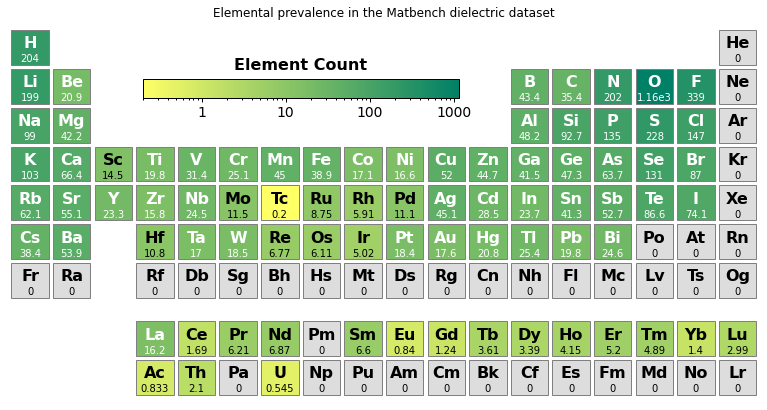

In [12]:
df_diel["volume"] = df_diel.structure.apply(lambda cryst: cryst.volume)
df_diel["formula"] = df_diel.structure.apply(lambda cryst: cryst.formula)

ptable_heatmap(df_diel.formula, log=True)
plt.title("Elemental prevalence in the Matbench dielectric dataset")
# plt.savefig("dielectric-ptable-heatmap-log.pdf")

array([[<AxesSubplot:title={'center':'n'}>,
        <AxesSubplot:title={'center':'volume'}>, <AxesSubplot:>]],
      dtype=object)

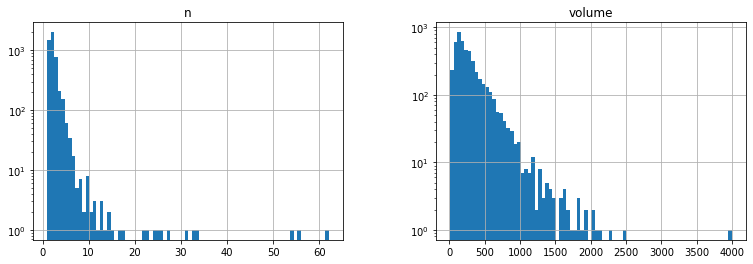

In [14]:
df_diel.hist(bins=80, log=True, figsize=(20, 4), layout=(1, 3))
# plt.savefig("dielectric-hists.pdf")

Text(0.5, 1.1, 'Space group histogram')

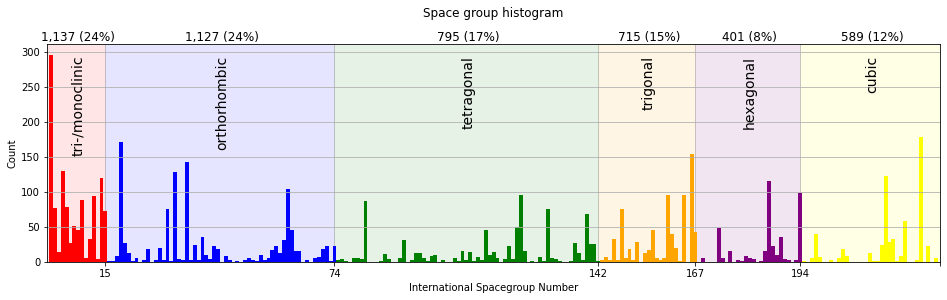

In [15]:
ax = spacegroup_hist(df_diel.spg_num)
ax.set_title("Space group histogram", y=1.1)
# plt.savefig("dielectric-spacegroup-hist.pdf")

In [18]:
fig = spacegroup_sunburst(df_diel.spg_num, show_counts="percent")
fig.update_layout(title="Space group sunburst")
fig.write_image("dielectric-spacegroup-sunburst.pdf")
fig.show()

/Users/janosh/.venv/py310/lib/python3.10/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/janosh/.venv/py310/lib/python3.10/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [17]:
labels = {"crys_sys": "Crystal system", "n": "Refractive index n"}

fig = px.violin(df_diel, color="crys_sys", x="crys_sys", y="n", labels=labels)
fig.update_layout(
    title="Refractive index distribution by crystal system",
    margin=dict(b=10, l=10, r=10, t=50),
    showlegend=False,
)
fig.write_image("dielectric-violin.pdf")
fig.show()
